In [1]:
import csv
import numpy as np
import pandas as pd
#import seaborn as sns
#import sklearn as skl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path="F:\\datathon\\"

In [ ]:



companies= pd.read_csv(path+"companies.csv",encoding="ISO-8859-1")

econ_state=pd.read_csv(path+"econ_state.csv",encoding="ISO-8859-1")
sectors=pd.read_csv(path+"sectors.csv",encoding="ISO-8859-1")

In [45]:
jobs=pd.read_csv(path+"jobs.csv.gz", encoding='ISO-8859-1', compression='gzip')
jobs['year']=jobs['created_date'].apply(lambda x: int(x[:4]))
jobs['month']=jobs['created_date'].apply(lambda x: int(x[5:7]))
jobs['day']=jobs['created_date'].apply(lambda x: int(x[8:10]))

In [46]:
jobs1115=jobs[jobs.year>=2011]
jobs1115=jobs1115[jobs1115.year<=2015]

In [ ]:
pd.unique(jobs1115['year'])

In [ ]:
jobs.columns.values

In [ ]:
jobs1115StateYear=pd.DataFrame({'value' : jobs1115.groupby( [ "state","year"] ).size()}).reset_index()
jobs1115State=pd.DataFrame({'value' : jobs1115.groupby( [ "state"] ).size()}).reset_index()
jobs1115StateYear.to_csv(path+"New\\jobs1115StateYear.csv",index=False)
jobs1115State.to_csv(path+"New\\jobs1115State.csv",index=False)

In [ ]:
jobsYear.head()

In [ ]:
jobs.columns.values

In [ ]:
ax = jobs1115.groupby('year')['hash'].count().plot()
ax.set_xlabel('year')
ax.set_ylabel('Yearly counts of new job postings')

In [ ]:
jobs1115.groupby('year')['hash'].count()

In [ ]:
econCols=econ_state.columns.values
gdp=econ_state.ix[:,0:48]
state=pd.DataFrame(econ_state.ix[:,0])
pci_initial=econ_state.ix[:,49:315]
pci=pd.concat([state, pci_initial], axis=1)
unemp=pd.concat([state,econ_state.ix[:,315:] ], axis=1)

In [ ]:
unemp=pd.melt(unemp, id_vars=["state"], var_name="Date", value_name="Value")
unemp['year']=unemp['Date'].apply(lambda x: x[:4])
unemp['month']=unemp['Date'].apply(lambda x: x[5:7])
del unemp['Date']
unemp.head()

In [ ]:
gdp=pd.melt(gdp, id_vars=["state"], var_name="Date", value_name="Value")
gdp['year']=gdp['Date'].apply(lambda x: x[:4])
gdp['Quarter']=gdp['Date'].apply(lambda x: x[5:6])
del gdp['Date']

In [ ]:
pci=pd.melt(pci, id_vars=["state"], var_name="Date", value_name="Value")
pci['year']=pci['Date'].apply(lambda x: x[:4])
pci['Quarter']=pci['Date'].apply(lambda x: x[5:6])
del pci['Date']
pci.head()

In [ ]:
pci.to_csv(path+"New\\per_capita.csv",index=False)
gdp.to_csv(path+"New\\gdp.csv",index=False)
unemp.to_csv(path+"New\\unemp.csv",index=False)

In [ ]:
education.head()

In [ ]:
education.columns.values

In [ ]:
jobs.head()

In [3]:
description = pd.read_csv(path+"descriptions.csv.gz", encoding='ISO-8859-1', compression='gzip')

In [8]:
description.head()

,hash,description
0,057687567f2595cb31e9d3792a95f4c0,Alere Toxicology is the global leader in the g...
1,06dd9ad33045e27a61190d233ac86735,Deciding where to work is a big decision. At B...
2,034e170a33ac403e513dc6187a4c134a,THE MISSION OF AN EDUCATOR (the Role): Educato...
3,0004c789459d94f09ef9498020261679,Bring your passion for fashion to today's Burl...
4,0546ba5b5d7c6f92e3618b960c58b41b,JEWELRY CONSULTANT Zale Corporation is a leadi...


In [9]:
demographics = pd.read_csv(path+"demographics.csv", encoding='ISO-8859-1')
outData=pd.DataFrame({'mean_household_income' : demographics.groupby( [ "state"] )['mean_household_income'].mean()}).reset_index()
outData.to_csv(path+"state_mean_household_income.csv",index=False)

In [24]:
education = pd.read_csv(path+"education.csv",encoding="ISO-8859-1")
education.head()

,city,state,no_schooling,nursery_school,kindergarten,1st,2nd,3rd,4th,5th,...,engineering,multidisciplinary,science_engineering_related,business,education,literature_languages,liberal_arts_history,visual_performing_arts,communications,other
0,Abbeville,LA,181,0,0,0,8,43,33,126,...,29,0,211,285,532,15,111,40,87,79
1,Abbeville,SC,50,0,0,0,0,0,33,19,...,0,0,86,108,77,35,15,0,0,40
2,Abbotsford,WI,17,0,0,15,0,2,0,35,...,0,0,27,29,80,12,4,4,8,6
3,Aberdeen,MS,43,0,0,0,0,3,0,13,...,3,0,58,102,190,0,9,11,0,82
4,Aberdeen,SD,56,0,0,0,0,0,84,0,...,176,0,613,1452,1207,192,214,104,114,296


In [25]:
education.columns.values

array(['city', 'state', 'no_schooling', 'nursery_school', 'kindergarten',
       '1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th',
       '10th', '11th', '12th_no_diploma', 'hs_diploma',
       'GED_or_alternative_credential', 'college_less_than_year',
       'college_more_than_year_no_degree', 'associate_degree',
       'bachelor_degree', 'master_degree', 'professional_degree',
       'doctorate_degree', 'computers_mathematics_statistics',
       'biological_agricultural_environmental_sciences',
       'physical_related_sciences', 'psychology', 'social_sciences',
       'engineering', 'multidisciplinary', 'science_engineering_related',
       'business', 'education', 'literature_languages',
       'liberal_arts_history', 'visual_performing_arts', 'communications',
       'other'], dtype=object)

In [33]:
descCat=pd.DataFrame(description['hash'])

In [35]:
descCat['business']=0

In [36]:
descCat['business']=description['description'].apply(lambda x: 1 if "business" in str(x).lower() else 0)

In [42]:
def check(x):
    if "computer" in str(x).lower() or "math" in str(x).lower() or "statistics" in str(x).lower():
        return 1
    else:
        return 0
    
descCat['Engineering']=description['description'].apply(lambda x: 1 if "master" in str(x).lower() else 0)
descCat['doctorate']=description['description'].apply(lambda x: 1 if "phd" in str(x).lower() or "p.h.d" in str(x).lower() else 0)

descCat['cms']=description['description'].apply(check)
descCat['business']=description['description'].apply(lambda x: 1 if "business" in str(x).lower() or  "mba" in str(x).lower() else 0)
descCat['engineering']=description['description'].apply(lambda x: 1 if "engineer" in str(x).lower() else 0)
descCat['sciences']=description['description'].apply(lambda x: 1 if "science" in str(x).lower() else 0)


In [43]:
descCat.head()

,hash,Bachelors,Masters,doctorate,cms,business,engineering,sciences
0,057687567f2595cb31e9d3792a95f4c0,1,0,0,1,0,0,1
1,06dd9ad33045e27a61190d233ac86735,0,1,0,0,1,1,0
2,034e170a33ac403e513dc6187a4c134a,0,0,0,1,0,0,0
3,0004c789459d94f09ef9498020261679,0,0,0,1,1,0,0
4,0546ba5b5d7c6f92e3618b960c58b41b,0,0,0,0,1,0,0


In [54]:
finalJobs1115 = pd.merge(jobs1115, descCat,  how='inner', left_on=["hash"] , right_on = ["hash"] )

In [ ]:
finalJobs1115.head()

In [50]:
descCat.loc[descCat['hash'] == '00001eb6c29012c28227bcd454d70212']

,hash,Bachelors,Masters,doctorate,cms,business,engineering,sciences


In [59]:
finalJobs1115.shape

(873503, 22)

In [63]:
outData.columns.values

array(['Bachelors', 'Masters', 'doctorate', 'cms', 'business',
       'engineering', 'sciences'], dtype=object)

In [64]:
outData.index

Bachelors  Masters  doctorate  cms  business  engineering  \
state year                                                              
AK    2011          0        0          0    0         0            0   
      2012          0        0          0    1         0            0   
      2013          0        0          0    0         3            0   
      2014          4        5          5  120       195           13   
      2015          6       13          0  347       409           72   

            sciences  
state year            
AK    2011         0  
      2012         1  
      2013         0  
      2014        12  
      2015        21

In [76]:
grouped = finalJobs1115.groupby(['state','year'])

#set up empty arrays to append data from below loop
array=[]
index=[]

#loop through the grouped data and sum up the array numbers 
for i,j in grouped:
    array.append({'business':j.business.sum(),'Engineering':j.Engineering.sum(),'doctorate':j.Engineering.sum(),
                  'cms':j.cms.sum(),'business':j.business.sum(),'engineering':j.engineering.sum(),'sciences':j.sciences.sum()})
    index.append(i)

In [84]:
outData=pd.DataFrame((array),index=index)  
outData['state']=outData.index.values
outData['year']=outData['state'].apply(lambda x: int(x[1]))
outData['state']=outData['state'].apply(lambda x: x[0])


In [93]:
outData.reset_index(0)
outData.head()
jobDescData=outData

In [94]:
jobDescData.head()

,Bachelors,Masters,business,cms,doctorate,engineering,sciences,state,year
"(AK, 2011)",0,0,0,0,0,0,0,AK,2011
"(AK, 2012)",0,0,0,1,0,0,1,AK,2012
"(AK, 2013)",0,0,3,0,0,0,0,AK,2013
"(AK, 2014)",4,5,195,120,5,13,12,AK,2014
"(AK, 2015)",6,13,409,347,13,72,21,AK,2015


In [90]:
education.columns.values
requiredCols=[ 'bachelor_degree', 'master_degree','doctorate_degree','']

array(['city', 'state', 'no_schooling', 'nursery_school', 'kindergarten',
       '1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th',
       '10th', '11th', '12th_no_diploma', 'hs_diploma',
       'GED_or_alternative_credential', 'college_less_than_year',
       'college_more_than_year_no_degree', 'associate_degree',
       'bachelor_degree', 'master_degree', 'professional_degree',
       'doctorate_degree', 'computers_mathematics_statistics',
       'biological_agricultural_environmental_sciences',
       'physical_related_sciences', 'psychology', 'social_sciences',
       'engineering', 'multidisciplinary', 'science_engineering_related',
       'business', 'education', 'literature_languages',
       'liberal_arts_history', 'visual_performing_arts', 'communications',
       'other'], dtype=object)

In [92]:
eduStateCount=pd.DataFrame({'educated' : education.groupby( [ "state"] )['education'].sum()}).reset_index()
eduStateCount.head()

,state,educated
0,AK,13298
1,AL,87898
2,AR,50114
3,AZ,168896
4,CA,562037


In [101]:
jobstateCount=pd.DataFrame({'jobsPosted' : jobs1115.groupby( [ "state"] ).size()}).reset_index()
jobstateCount.head()

,state,jobsPosted
0,AK,3146
1,AL,30207
2,AR,12222
3,AZ,41743
4,CA,315562


In [183]:
businessJobsDesc=pd.DataFrame({'business' : jobDescData.groupby( [ "state"] )['business'].sum()}).reset_index()
EngineeringJobsDesc=pd.DataFrame({'Engineering' : jobDescData.groupby( [ "state"] )['Engineering'].sum()}).reset_index()
businessJobsDesc=pd.DataFrame({'business' : jobDescData.groupby( [ "state"] )['business'].sum()}).reset_index()
EngineeringJobsDesc=pd.DataFrame({'Engineering' : jobDescData.groupby( [ "state"] )['engineering'].sum()}).reset_index()


In [185]:
businessEducation=pd.DataFrame({'business' : education.groupby( [ "state"] )['bachelor_degree'].sum()}).reset_index()
EngineeringEducation=pd.DataFrame({'Engineering' : education.groupby( [ "state"] )['master_degree'].sum()}).reset_index()
businessEducation=pd.DataFrame({'business' : education.groupby( [ "state"] )['business'].sum()}).reset_index()
EngineeringEducation=pd.DataFrame({'Engineering' : education.groupby( [ "state"] )['engineering'].sum()}).reset_index()

In [114]:
businessEducation.head()

,state,Bachelors
0,AK,57302
1,AL,335456
2,AR,169147
3,AZ,695175
4,CA,4789014


In [112]:
population=pd.DataFrame({'population' : demographics.groupby( [ "state"] )['population'].sum()}).reset_index()

In [119]:
popEduInfer = pd.merge(population, eduStateCount,  how='inner', left_on=["state"] , right_on = ["state"] )
popEduInfer =  pd.merge(popEduInfer, jobstateCount,  how='inner', left_on=["state"] , right_on = ["state"] )


In [120]:
popEduInfer.head()

,state,population,educated,jobsPosted
0,AK,484077,13298,3146
1,AL,2796563,87898,30207
2,AR,1611619,50114,12222
3,AZ,5968692,168896,41743
4,CA,36540108,562037,315562


In [125]:
popEduInfer['edu_norm']=popEduInfer['educated']/popEduInfer['population']
popEduInfer['job_norm']=popEduInfer['educated']/popEduInfer['jobsPosted']

popEduInfer.head()

,state,population,educated,jobsPosted,edu_norm,job_norm
0,AK,484077,13298,3146,0.027471,4.226955
1,AL,2796563,87898,30207,0.031431,2.909855
2,AR,1611619,50114,12222,0.031095,4.100311
3,AZ,5968692,168896,41743,0.028297,4.046092
4,CA,36540108,562037,315562,0.015381,1.781067


In [129]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(popEduInfer['edu_norm'])
edu_normalized = pd.DataFrame(np_scaled)
np_scaled = min_max_scaler.fit_transform(popEduInfer['job_norm'])
job_normalized = pd.DataFrame(np_scaled)

C:\Users\sriram\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\sriram\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\sriram\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single 

In [131]:
df_normalized.head()

,0
0,0.521287
1,0.692033
2,0.677576
3,0.556909
4,0.000000


In [132]:
job_normalized.head()

,0
0,0.475210
1,0.309009
2,0.459229
3,0.452387
4,0.166570


In [135]:
popEduInfer['edu_norm']=edu_normalized*100
popEduInfer['job_norm']=job_normalized*100

In [136]:
popEduInfer.head()

,state,population,educated,jobsPosted,edu_norm,job_norm
0,AK,484077,13298,3146,52.128661,47.520955
1,AL,2796563,87898,30207,69.203335,30.900866
2,AR,1611619,50114,12222,67.757616,45.922873
3,AZ,5968692,168896,41743,55.690948,45.238695
4,CA,36540108,562037,315562,0.000000,16.657018


In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(x=popEduInfer["state"], y=[popEduInfer["edu_norm"], popEduInfer["job_norm"]], kind="bar")

In [147]:
 statedata=pd.read_csv("C:\\Users\\sriram\\Anaconda3\\Scripts\\states.csv")

In [148]:
outFinal=pd.merge(popEduInfer, statedata, how='left',left_on="state",right_on="Abbreviation")

In [149]:
outFinal.head()

,state,population,educated,jobsPosted,edu_norm,job_norm,State,Abbreviation
0,AK,484077,13298,3146,52.128661,47.520955,Alaska,AK
1,AL,2796563,87898,30207,69.203335,30.900866,Alabama,AL
2,AR,1611619,50114,12222,67.757616,45.922873,Arkansas,AR
3,AZ,5968692,168896,41743,55.690948,45.238695,Arizona,AZ
4,CA,36540108,562037,315562,0.000000,16.657018,California,CA


In [161]:
usState_new=outFinal[['State','job_norm']]
usStateJson=usState_new.to_json(orient = "records")
usStateJsonfinalOutput=usStateJson[1:len(usStateJson)-1].upper().replace("\"STATE\"","ucName").replace("job_norm","value")
with open(path+'usStates-jobCount.json', 'w') as outfile:
    outfile.write(usStateJsonfinalOutput)

In [163]:
popEduInfer =  pd.merge(popEduInfer, businessJobsDesc,  how='inner', left_on=["state"] , right_on = ["state"] )

In [188]:
popEduInfer =  pd.merge(popEduInfer, EngineeringEducation,  how='inner', left_on=["state"] , right_on = ["state"] )
popEduInfer =  pd.merge(popEduInfer, EngineeringJobsDesc,  how='inner', left_on=["state"] , right_on = ["state"] )
popEduInfer =  pd.merge(popEduInfer, businessEducation,  how='inner', left_on=["state"] , right_on = ["state"] )
popEduInfer =  pd.merge(popEduInfer, businessJobsDesc,  how='inner', left_on=["state"] , right_on = ["state"] )
popEduInfer =  pd.merge(popEduInfer, EngineeringEducation,  how='inner', left_on=["state"] , right_on = ["state"] )
popEduInfer =  pd.merge(popEduInfer, EngineeringJobsDesc,  how='inner', left_on=["state"] , right_on = ["state"] )


In [189]:
popEduInfer.head()

,state,population,educated,jobsPosted,edu_norm,job_norm,Bachelors_x,Bachelors_y,Bachelors_jobs,Bachelors_actual,...,Bachelors_x,Bachelors_y,Bachelors_x,Bachelors_y,Masters_x,Masters_y,business_x,business_y,Engineering_x,Engineering_y
0,AK,484077,13298,3146,52.128661,47.520955,57302,10,0.006130,0.003311,...,10,10,10,10,22668,18,15776,607,6993,85
1,AL,2796563,87898,30207,69.203335,30.900866,335456,160,0.064555,0.052980,...,160,160,160,160,140644,981,131668,4358,45492,2131
2,AR,1611619,50114,12222,67.757616,45.922873,169147,71,0.029623,0.023510,...,71,71,71,71,66449,521,61768,2658,13505,269
3,AZ,5968692,168896,41743,55.690948,45.238695,695175,559,0.140112,0.185099,...,559,559,559,559,294649,1000,250211,7735,98783,2068
4,CA,36540108,562037,315562,0.000000,16.657018,4789014,2503,1.000000,0.828808,...,2503,2503,2503,2503,1883933,8208,1469434,58047,790458,19376


C:\Users\sriram\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\sriram\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\sriram\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\sriram\Anaconda3\lib\site-packag

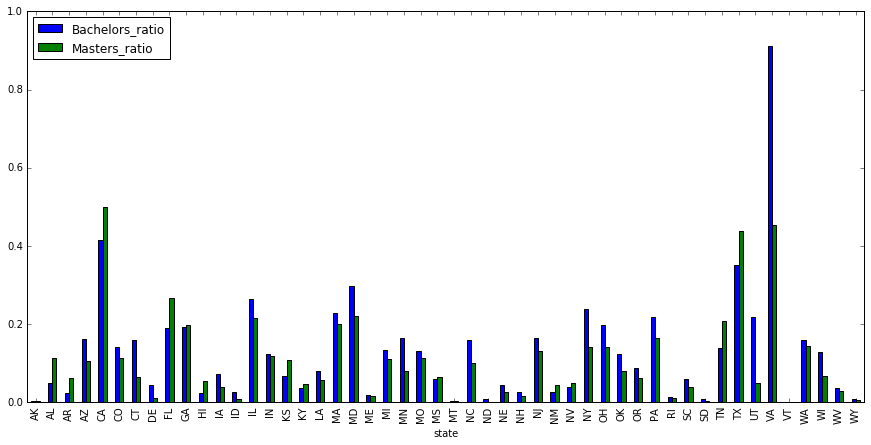

In [192]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(popEduInfer['Bachelors_x'])
Bachelors_jobs = pd.DataFrame(np_scaled)
np_scaled = min_max_scaler.fit_transform(popEduInfer['Bachelors_y'])
Bachelors_actual = pd.DataFrame(np_scaled)
popEduInfer['Bachelors_jobs']=Bachelors_jobs
popEduInfer['Bachelors_actual']=Bachelors_actual
popEduInfer['Bachelors_ratio']=popEduInfer['Bachelors_actual']/(popEduInfer['Bachelors_jobs']+1)

np_scaled = min_max_scaler.fit_transform(popEduInfer['Masters_x'])
Masters_jobs = pd.DataFrame(np_scaled)
np_scaled = min_max_scaler.fit_transform(popEduInfer['Masters_y'])
Masters_actual = pd.DataFrame(np_scaled)
popEduInfer['Masters_jobs']=Masters_jobs
popEduInfer['Masters_actual']=Masters_actual
popEduInfer['Masters_ratio']=popEduInfer['Masters_actual']/(popEduInfer['Masters_jobs']+1)

popEduInfer.plot(x="state", y=["Bachelors_ratio","Masters_ratio"], kind="bar",figsize=(15,7))


C:\Users\sriram\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\sriram\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\sriram\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\sriram\Anaconda3\lib\site-packag

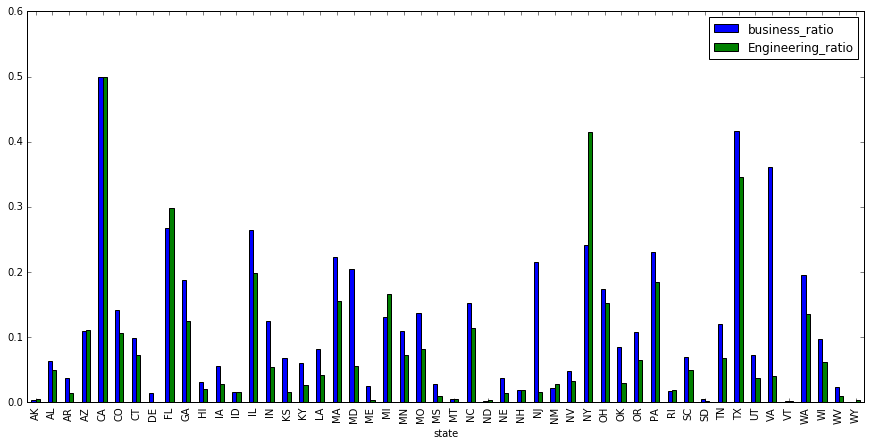

In [195]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(popEduInfer['business_x'])
business_jobs = pd.DataFrame(np_scaled)
np_scaled = min_max_scaler.fit_transform(popEduInfer['business_y'])
business_actual = pd.DataFrame(np_scaled)
popEduInfer['business_jobs']=business_jobs
popEduInfer['business_actual']=business_actual
popEduInfer['business_ratio']=popEduInfer['business_actual']/(popEduInfer['business_jobs']+1)

np_scaled = min_max_scaler.fit_transform(popEduInfer['Engineering_x'])
Engineering_jobs = pd.DataFrame(np_scaled)
np_scaled = min_max_scaler.fit_transform(popEduInfer['Engineering_y'])
Engineering_actual = pd.DataFrame(np_scaled)
popEduInfer['Engineering_jobs']=Engineering_jobs
popEduInfer['Engineering_actual']=Engineering_actual
popEduInfer['Engineering_ratio']=popEduInfer['Engineering_jobs']/(popEduInfer['Engineering_actual']+1)

popEduInfer.plot(x="state", y=["business_ratio","Engineering_ratio"], kind="bar",figsize=(15,7),ylim=(0,0.6))

In [197]:
popEduInfer.to_csv(path+"popEduInfer.csv",index=False)